In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | glendive
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | aswan
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | beira
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | lianzhou
Processing Record 16 of Set 1 | ribeirao bonito
Processing Record 17 of Set 1 | vao
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | souillac

Processing Record 36 of Set 4 | mount gambier
Processing Record 37 of Set 4 | new norfolk
Processing Record 38 of Set 4 | qafsah
City not found. Skipping...
Processing Record 39 of Set 4 | tulsa
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | zhezkazgan
Processing Record 43 of Set 4 | tezu
Processing Record 44 of Set 4 | edd
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | talnakh
Processing Record 47 of Set 4 | douentza
Processing Record 48 of Set 4 | bria
Processing Record 49 of Set 4 | balad
Processing Record 50 of Set 4 | hithadhoo
Processing Record 1 of Set 5 | roald
Processing Record 2 of Set 5 | pimenteiras
Processing Record 3 of Set 5 | rapid valley
Processing Record 4 of Set 5 | tsaratanana
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | portel
Processing Record 7 of Set 5 | sioux lookout
Processing Record 8 of Set 5 | cockburn town
Processing Record 9 of S

Processing Record 22 of Set 8 | weston
Processing Record 23 of Set 8 | henties bay
Processing Record 24 of Set 8 | culiacan
Processing Record 25 of Set 8 | scarborough
Processing Record 26 of Set 8 | adrar
Processing Record 27 of Set 8 | half moon bay
Processing Record 28 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 29 of Set 8 | bilma
Processing Record 30 of Set 8 | bara
Processing Record 31 of Set 8 | rocha
Processing Record 32 of Set 8 | staryy nadym
Processing Record 33 of Set 8 | ucluelet
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | kayseri
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | ryotsu
Processing Record 38 of Set 8 | vanimo
Processing Record 39 of Set 8 | akyab
Processing Record 40 of Set 8 | clinton
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | thompson
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | mackay
Processing Record 45 of Set 8 | kinel
P

Processing Record 14 of Set 12 | mezen
Processing Record 15 of Set 12 | moron
Processing Record 16 of Set 12 | kununurra
Processing Record 17 of Set 12 | sosnovo-ozerskoye
Processing Record 18 of Set 12 | capreol
Processing Record 19 of Set 12 | bamboo
Processing Record 20 of Set 12 | ambon
Processing Record 21 of Set 12 | ternate
Processing Record 22 of Set 12 | gulshat
City not found. Skipping...
Processing Record 23 of Set 12 | gumaus
Processing Record 24 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 25 of Set 12 | saint george
Processing Record 26 of Set 12 | tucuma
Processing Record 27 of Set 12 | bucine
Processing Record 28 of Set 12 | george
Processing Record 29 of Set 12 | kudahuvadhoo
Processing Record 30 of Set 12 | batticaloa
Processing Record 31 of Set 12 | issoire
Processing Record 32 of Set 12 | ongandjera
Processing Record 33 of Set 12 | galgani
City not found. Skipping...
Processing Record 34 of Set 12 | te karaka
Processing Record 35 of Set 12 |

In [9]:
len(city_data)

535

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,73.94,51,4,1.99,US,2022-06-10 17:11:09
1,Glendive,47.1053,-104.7125,70.18,72,75,10.36,US,2022-06-10 17:12:17
2,Georgetown,5.4112,100.3354,80.53,83,20,0.00,MY,2022-06-10 17:09:50
3,Norman Wells,65.2820,-126.8329,53.96,56,100,10.89,CA,2022-06-10 17:08:11
4,Atuona,-9.8000,-139.0333,77.11,73,22,16.51,PF,2022-06-10 17:10:30
5,Tuktoyaktuk,69.4541,-133.0374,37.20,71,89,9.73,CA,2022-06-10 17:12:18
6,Aswan,24.0934,32.9070,102.49,10,0,9.37,EG,2022-06-10 17:12:19
7,Punta Arenas,-53.1500,-70.9167,39.31,70,75,14.97,CL,2022-06-10 17:06:49
8,Hamilton,39.1834,-84.5333,76.64,58,20,5.75,US,2022-06-10 17:11:42
9,Mahebourg,-20.4081,57.7000,70.09,94,75,12.66,MU,2022-06-10 17:10:59


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df_2 = city_data_df[new_column_order]
city_data_df_2.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-06-10 17:11:09,42.6001,-73.9662,73.94,51,4,1.99
1,Glendive,US,2022-06-10 17:12:17,47.1053,-104.7125,70.18,72,75,10.36
2,Georgetown,MY,2022-06-10 17:09:50,5.4112,100.3354,80.53,83,20,0.00
3,Norman Wells,CA,2022-06-10 17:08:11,65.2820,-126.8329,53.96,56,100,10.89
4,Atuona,PF,2022-06-10 17:10:30,-9.8000,-139.0333,77.11,73,22,16.51


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df_2.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

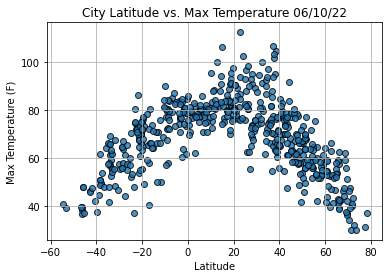

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

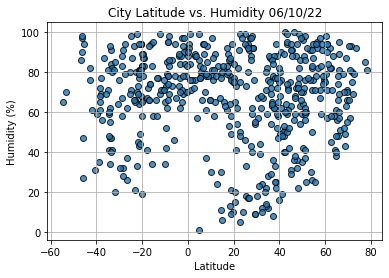

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

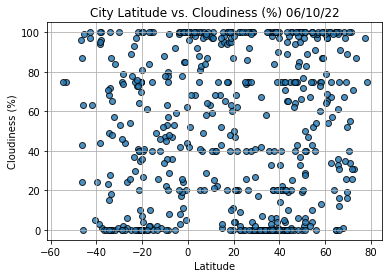

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

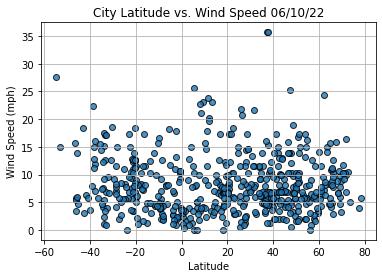

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Lat                        62.456
Lng                     -114.3525
Max Temp                    66.47
Humidity                       45
Cloudiness                     67
Wind Speed                   7.25
Country                        CA
Date          2022-06-10 17:11:10
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
530    False
531    False
532    False
533     True
534     True
Name: Lat, Length: 535, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,73.94,51,4,1.99,US,2022-06-10 17:11:09
1,Glendive,47.1053,-104.7125,70.18,72,75,10.36,US,2022-06-10 17:12:17
2,Georgetown,5.4112,100.3354,80.53,83,20,0.00,MY,2022-06-10 17:09:50
3,Norman Wells,65.2820,-126.8329,53.96,56,100,10.89,CA,2022-06-10 17:08:11
5,Tuktoyaktuk,69.4541,-133.0374,37.20,71,89,9.73,CA,2022-06-10 17:12:18


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

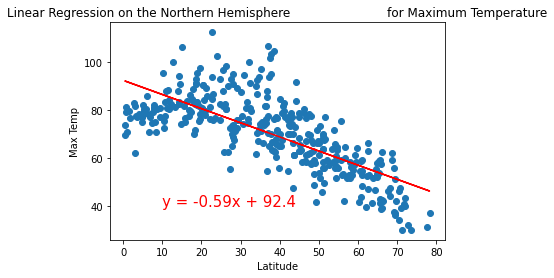

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

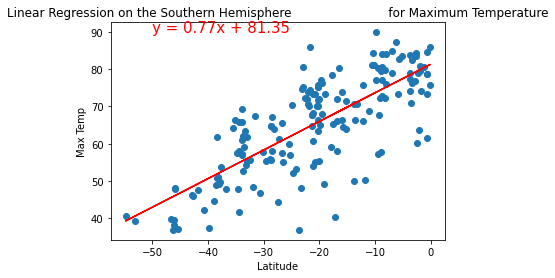

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

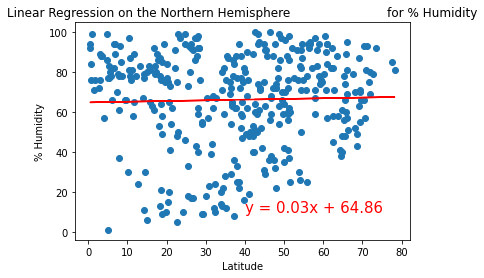

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

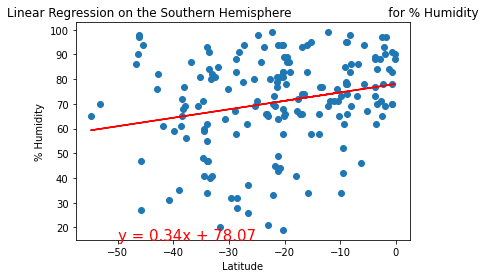

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

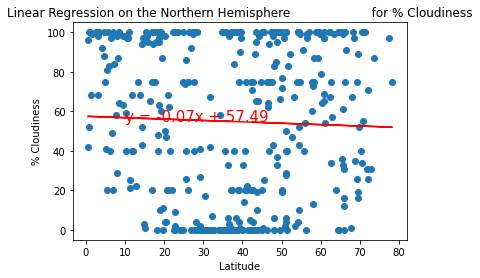

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

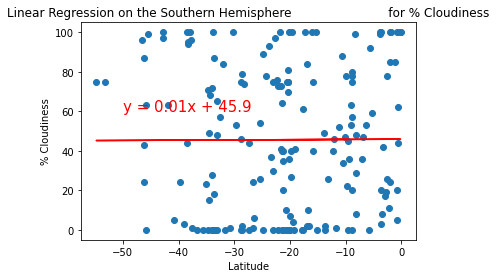

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

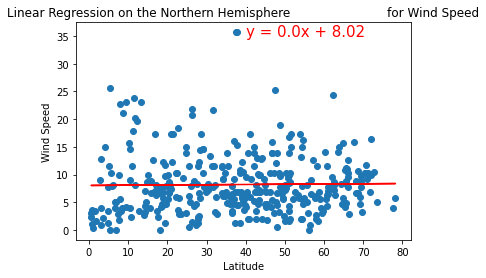

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

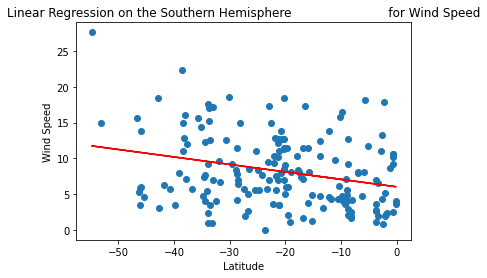

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))